In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


from the dataset we can see that there  r different columns in which both categorical and continous data present.I feel that passenger Id is given on the basis of indexes so there is no much usage with that id so we can go ahead and delete the column,names of the passengers r also not required to predict the data so am going to delete that,and also the ticket with that column also we r not doing anything so am going to delete that column also

In [3]:
data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [4]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [5]:

#checking for the shape of the data
data.shape

(891, 9)

In [6]:
#checking nulls of the data
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are null values in some of the columns age,cabin,embarked.But in cabin column there r more than 70% of the data with null values so going further to delete the column from the dataset in age column we use mean or median method to fill the null values,in embarked column we use mode method to fill the null values 

In [7]:
#checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


by info method we can notice that there are object type,int type and float type of variables in the dataset

since there are null values in the dataset lets convert them

In [8]:
#dropping the cabin column from the dataset
data=data.drop(columns=['Cabin'])

In [9]:
#fill the missing values of embarked column using mode method
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
#Using mean method to fill the values of age in age column
data['Age']=data['Age'].fillna(data['Age'].mean())


In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


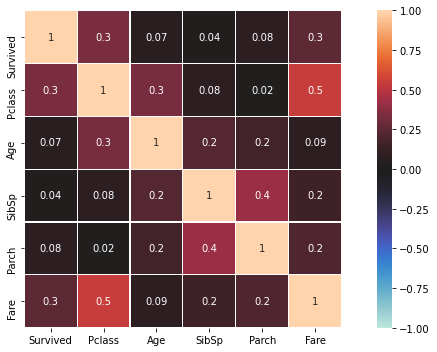

In [12]:
#lets find the corelation from heat map
df_corr=data.corr().abs()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

There is no much corleation between one feature to the other feature and there is no much relation with the label too and there is no problem of multicollinearity, the label is little corelated with the pclass and fare and not corelated with sibsp 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
#describing the data using describe method to check the stats
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In describe method we only get the continous data information but not the categorical data information.The data seems to be having more outliers and skewness in that data

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

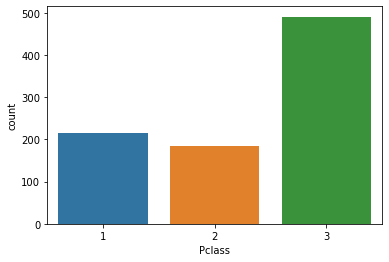

In [15]:
#Lets check the count plot of the data for each column
#count plot for type of the class
print(data['Pclass'].value_counts())
sns.countplot(data['Pclass'])


from the Pclass we can know that many of the passengers travelling in 3rd class,some of them r travelling in 1st class,very few r travelling in 2nd class 

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

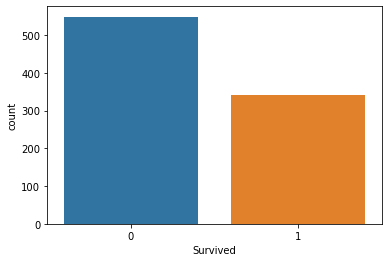

In [16]:
#lets plot count plot for the label
print(data['Survived'].value_counts())
sns.countplot(data['Survived'])


The blue graph indicates the passengers they lost there life in the big disater which is of huge loss.Where as the orange graph indicates where the passengers survived from the disater which is of less in area

In [17]:
#count plot for sex column
print((list(data['Sex'].value_counts().keys()),list(data['Sex'].value_counts())))


(['male', 'female'], [577, 314])


<AxesSubplot:xlabel='Sex', ylabel='count'>

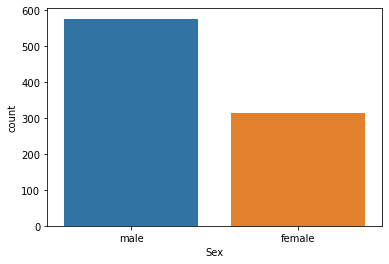

In [18]:
sns.countplot(data['Sex'])

In the ship there are more male population than the female population

<AxesSubplot:xlabel='Age', ylabel='Density'>

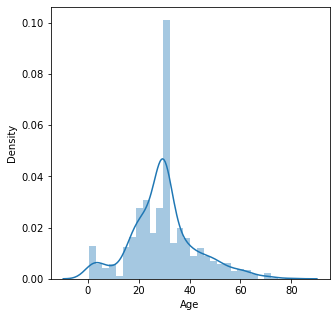

In [19]:
#Age is the continous data so lets use dist plot to check the flow of the data
plt.figure(figsize=(5,5))
sns.distplot(data['Age'])

from the dist plot we can see that the age from 0 to 10 years are less populated,where the maximum population is from the age range of 20 to 40 years,whereas the age group from 60 to 80 also less populated and the data also seems to be skewd other wise the data is normally distributed

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

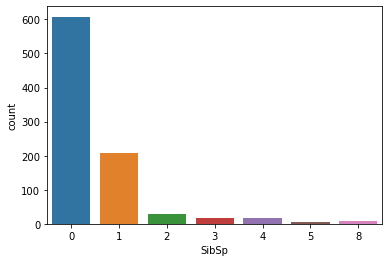

In [20]:
#count plot of sibiling and spouseC column
print(data['SibSp'].value_counts())
sns.countplot(data['SibSp'])

Almost 80% of the passengers they have travelled alone Neither of there sibilings or their spouse travelled with them in the ship where as the other passengers of approximately 10% of them travelled with either of their one sibiling or spouse, Remaining 10% of them travelled with 2 0r more with them 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

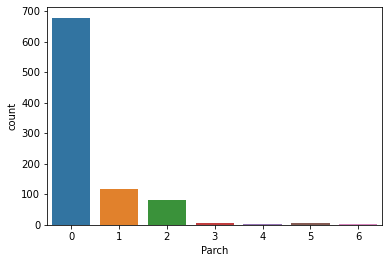

In [21]:
#count plot for parent or children travelling with them
print(data['Parch'].value_counts())
sns.countplot(data['Parch'])

Almost 80% of the passengers they have travelled alone, Neither of there childrens or their parents travelled with them in the ship where as the other passengers of approximately 10% to 15% of them travelled with either of their one or two childrens or parents, Remaining 5% of them travelled with 3 0r more with them 

<AxesSubplot:xlabel='Fare', ylabel='Count'>

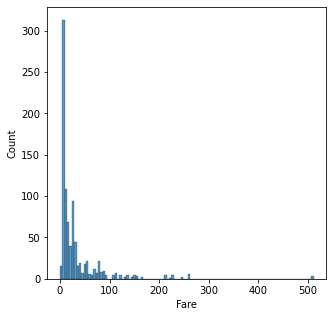

In [22]:
#Plotting the hist plot to check the flow of data for Fare column
plt.figure(figsize=(5,5))
sns.histplot(data['Fare'])

For continous data we mostly use the histplot to check the flow of the data where as for the categorical data we use bar graph to check the data so as fare is a continous data am using hist plot to check the flow of data from the hist plot I observed that mostly the passengers travelling on the fare range from 0 to 100 dollars in that 10 to 30 dollars of amount they have sent on the ticket from 50 to 100 fare few of them spent but from 100 to 250 dollars a very few people spent

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

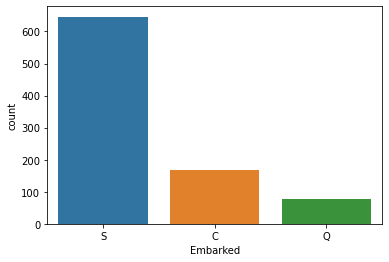

In [23]:
#count plot for people travelling from different places
print(data['Embarked'].value_counts())
sns.countplot(data['Embarked'])

S=southampton,C=cherbourg,Q=Queenstown these are the places from where the people travelled from among that almost 85% of the population travelled from 'S' place, the other 10% of the population travelled from the 'C',remaining 5% of the population travelled from 'Q'

In [24]:
#Analysing the data comparing with the label and feature using cross tab
pd.crosstab(data['Pclass'],data['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


from the above observations the people travelling in the 1. 1st class have more percentage of chance of survival 2. 2nd class almost equal chance of saving and not saving of their lifes,3. 3rd class less chance of survival we can conclude that 

In [25]:
pd.crosstab(data['Sex'],data['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


from the above observations we can say that many of the females on the ship were were survived and male they lost their lifes

In [26]:
pd.crosstab(data['Age'],data['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Age,,
0.42,0.0,100.0
0.67,0.0,100.0
0.75,0.0,100.0
0.83,0.0,100.0
0.92,0.0,100.0
...,...,...
70.00,100.0,0.0
70.50,100.0,0.0
71.00,100.0,0.0


from the above cross  we can know how many of the people with different age group got survived and how many of them lost their lifes

In [27]:
pd.crosstab(data['Embarked'],data['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


The people travelled from the place cherbourg,have survived more compared to other cities

In [28]:
#Adding the two columns of the family to get as one column
data['family']=data['SibSp']+data['Parch']
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,3
889,1,1,male,26.000000,0,0,30.0000,C,0


Since there are two features of the same family am combining both the features to make it as one column to which am giving the name family

In [29]:
#lets convert the categorical columns to continous columns using one hot encoder technique
#using get dummies method
data=pd.get_dummies(data=data,columns=['Sex','Embarked'],drop_first=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,3,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,0,0


By using one hot encoder of get dummies method each column forms different dummies so in this we have an option of deleting the first formed dummy, in this many extra columns forms so by assigning drop_first we can delete the column

In [30]:
#Let me delete the columns of SibSp,Parch
data.drop(columns=['SibSp','Parch'],inplace=True)
data

,Survived,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,1,1,0,1
1,1,1,38.000000,71.2833,1,0,0,0
2,1,3,26.000000,7.9250,0,0,0,1
3,1,1,35.000000,53.1000,1,0,0,1
4,0,3,35.000000,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1,0,1
887,1,1,19.000000,30.0000,0,0,0,1
888,0,3,29.699118,23.4500,3,0,0,1
889,1,1,26.000000,30.0000,0,1,0,0


In [31]:
data.shape

(891, 8)

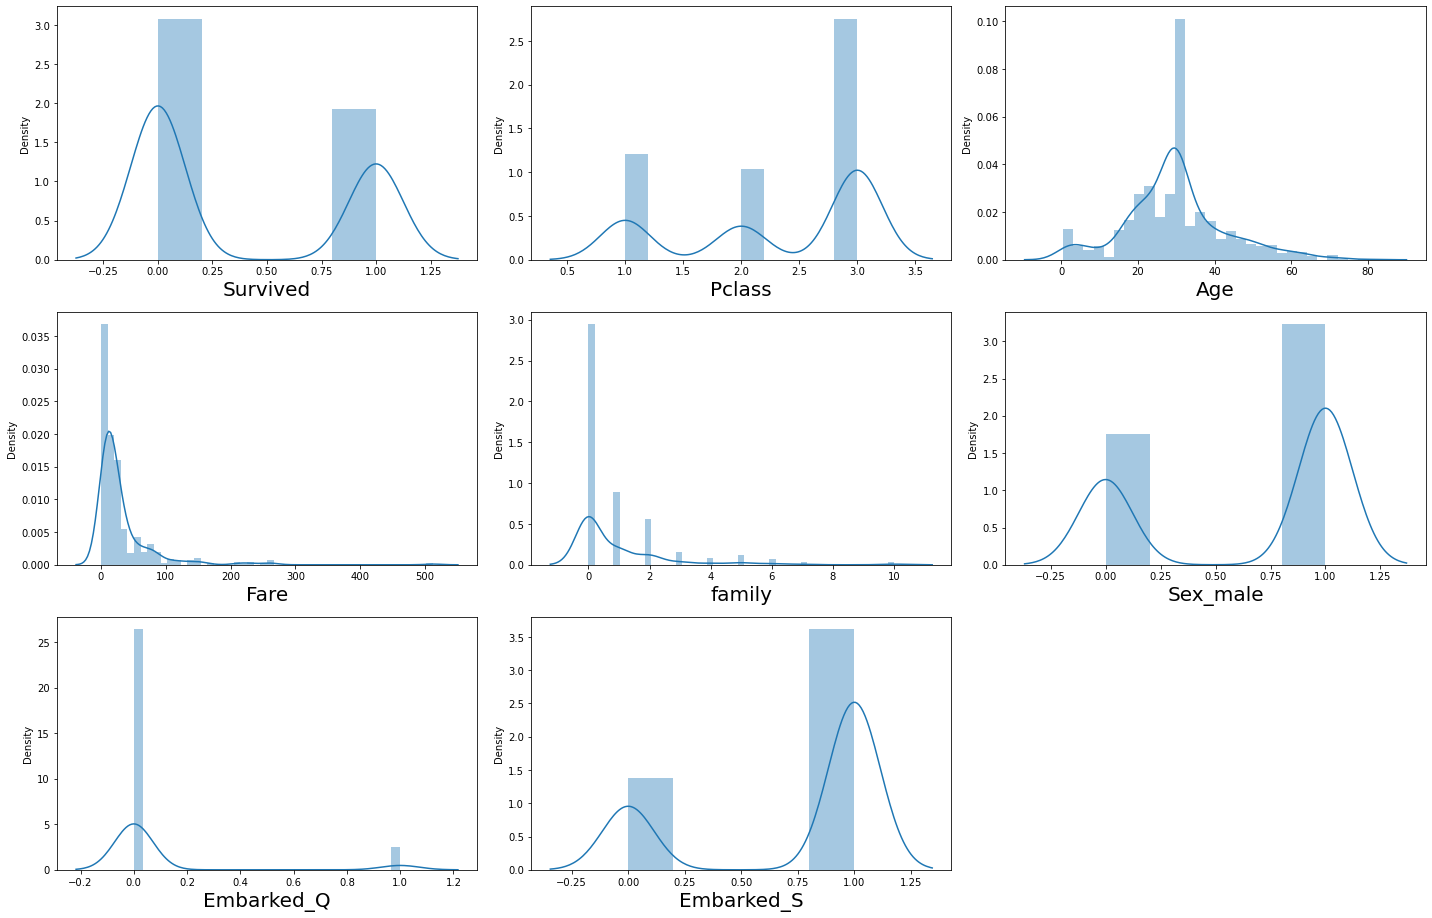

In [32]:
#lets plot the distribution plot for all the columns
#lets visualise the data, how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    


From the distribution plot we can notice that there is some skewness in some of the columns in age column data seems to be normal distributed but there is some skewness on both the sides,in fare the graph is right skewed,in other columns there is some skewness but not much even though lets check the box plot to find the outliers and then remove it after that again we plot dist plot and then again the distribution

In [33]:
data.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.434488
Fare          4.787317
family        2.727441
Sex_male     -0.618921
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

In [34]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['Age','Fare']
data[feature_scale]=scaler.fit_transform(data[feature_scale])
data.head(800)

,Survived,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.592481,-0.502445,1,1,0,1
1,1,1,0.638789,0.786845,1,0,0,0
2,1,3,-0.284663,-0.488854,0,0,0,1
3,1,1,0.407926,0.420730,1,0,0,1
4,0,3,0.407926,-0.486337,0,1,0,1
...,...,...,...,...,...,...,...,...
795,0,2,0.715743,-0.386671,0,1,0,1
796,1,1,1.485287,-0.126345,0,0,0,1
797,1,3,0.100109,-0.473586,0,0,0,1
798,0,3,0.023154,-0.502864,0,1,0,0


In [35]:
#seperating the features and label in x and y
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [36]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [37]:
#Splitting the dataset into train and test data
#importing the tratn test split 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

since the label has classification problem, of 2 classes then it comes under binary classification.So,lets use some classifiers to predict the label


In [38]:
#imorting the models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
#splitting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=300)

In [40]:
#instantiating the model
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [41]:
#predicting the data
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1], dtype=int64)

In [42]:
#accuracy score
print(accuracy_score(y_test,y_pred)*100)

77.13004484304933


In [43]:
#Finding cross val score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  79.12685958194714


In [44]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       141
           1       0.69      0.68      0.69        82

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



In [45]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[116,  25],
       [ 26,  56]], dtype=int64)

In [46]:
#importing knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
#predicting 
y_pred=knn.predict(x_test)

In [48]:
#accuracy score
accuracy_score(y_test,y_pred)

0.7982062780269058

In [49]:
#Finding cross val score
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  79.68865733475614


In [50]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.71      0.72        82

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [51]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[120,  21],
       [ 24,  58]], dtype=int64)

In [52]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
#predicting the data
y_pred=DT.predict(x_test)

In [54]:
#accuracy score
accuracy_score(y_test,y_pred)

0.7713004484304933

In [55]:
#Finding cross val score
scr=cross_val_score(DT,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  76.43336890339589


In [56]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       141
           1       0.70      0.66      0.68        82

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



In [57]:
confusion_matrix(y_test,y_pred)

array([[118,  23],
       [ 28,  54]], dtype=int64)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred=rf.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred)*100

81.61434977578476

In [61]:
#Finding cross val score
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  81.03697194149771


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.76      0.73      0.75        82

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.82      0.82       223



In [63]:
confusion_matrix(y_test,y_pred)

array([[122,  19],
       [ 22,  60]], dtype=int64)

In [64]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)


SVC()

In [65]:
y_pred=svm.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred)

0.7982062780269058

In [67]:
#Finding cross val score
scr=cross_val_score(svm,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  82.37963718536187


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.71      0.72        82

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [69]:
confusion_matrix(y_test,y_pred)

array([[120,  21],
       [ 24,  58]], dtype=int64)

In [70]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)

[18:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred=xgb.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred)

0.7892376681614349

In [73]:
#Finding cross val score
scr=cross_val_score(xgb,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

[18:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       141
           1       0.72      0.70      0.71        82

    accuracy                           0.79       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



In [75]:
confusion_matrix(y_test,y_pred)

array([[119,  22],
       [ 25,  57]], dtype=int64)

From all the observations of the model the Random Forest has good accuracy and cross validation score so the best fit model for the titanic dataset is Random forest

In [78]:
#Hyper Parameter Tuning using GridSearchCV
params={'criterion':['entropy','gini'],'max_depth':range(0,15,1),'min_samples_split':range(1,100,10),'min_samples_leaf':range(10,100,10)}

In [79]:
grd=GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 41}

In [102]:
rf=RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split=2,min_samples_leaf=2)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [103]:
accuracy_score(y_test,y_pred)*100

82.95964125560538

In [106]:
#Finding cross val score
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  82.04820789655388


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       141
           1       0.80      0.72      0.76        82

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



By using hyper parameter tuning there is little improvement in the accuracy any how by above cross val score Random Forest classifier is the best fit model for titanic dataset

In [109]:
#comparing original data v/s predicted data
a=np.array(y_test)
predicted=np.array(y_pred)
df_com=pd.DataFrame({'Actual':a,'Predicted':predicted},index=range(len(a)))
df_com

,Actual,Predicted
0,1,0
1,0,1
2,1,1
3,1,0
4,0,0
...,...,...
218,1,0
219,0,0
220,0,0
221,0,0


In [110]:
#Model Saving
import pickle
filename='Titanic.pkl'
pickle.dump(rf,open(filename,'wb'))